 # Gathering Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import re
from IPython.display import HTML

## 1- Gather data from 'twitter-archive-enhanced.csv':

In [2]:
#read the csv file
df_twetter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
#check the imported file
df_twetter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

## 2- Gather data from "image_predictions.tsv":

In [4]:
# save HTML to file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#check the file aquired
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:
#create a folder for data
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
#Write data to a file in our folder
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [8]:
#Read the file, using the tab sepration
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
#check the file aquired
df_image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## 3- Gather data from "Twitter API":

In [10]:
#import Twitter API json file (line by line)
import json
data = [json.loads(line) for line in open('tweet-json', 'r')]

In [11]:
#Check imported data
data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [12]:
# convert data to dataframe
data_api = pd.DataFrame(data)
data_api.head()

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39467   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33819   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25461   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42908   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41048   

   favorited                                          full_text   geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None   
1      False  This is Tilly. She's just checking pup on you....  None   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None   
3      False  This is Darla. She commenced a snooze mid meal...  None   
4      False  This is Franklin. He would like you to stop ca...  None   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

   possibly_sensitive_appealable quoted_status quoted_status_id  \
0                          False           NaN              NaN   
1                          False           NaN              NaN   
2                          False           NaN              NaN   
3                          False           NaN              NaN   
4                          False           NaN              NaN   

   quoted_status_id_str retweet_count  retweeted retweeted_status  \
0                   NaN          8853      False              NaN   
1                   NaN          6514      False              NaN   
2                   NaN          4328      False              NaN   
3                   NaN          8964      False              NaN   
4                   NaN          9774      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

In [34]:
# save twettr_api data as csv file
data_api.to_csv('df_twettr_api.csv')

In [35]:
# save twettr_df_image_predictions as csv file
df_image_predictions.to_csv('df_image_predictions.csv')

In [36]:
# save df_twetter_archive.csv as csv file
df_twetter_archive.to_csv('df_twetter_archive.csv')

# 2- Assessing:

## 1-Assessing df_image_predictions Data

In [37]:
# import the data file
df_image_predictions = pd.read_csv('df_image_predictions.csv')

# Show the first 10 rows for visual assessment
df_image_predictions.head(10)

Unnamed: 0            tweet_id  \
0           0  666020888022790149   
1           1  666029285002620928   
2           2  666033412701032449   
3           3  666044226329800704   
4           4  666049248165822465   
5           5  666050758794694657   
6           6  666051853826850816   
7           7  666055525042405380   
8           8  666057090499244032   
9           9  666058600524156928   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   
5  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg        1   
6  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg        1   
7  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg        1   
8  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg        1   
9  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg        1   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         German_shepherd  0.596461    True            malinois  0.138584   
3     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          Rottweiler  0.243682   
5    Bernese_mountain_dog  0.651137    True    English_springer  0.263788   
6              box_turtle  0.933012   False          mud_turtle  0.045885   
7                    chow  0.692517    True     Tibetan_mastiff  0.058279   
8           shopping_cart  0.962465   False     shopping_basket  0.014594   
9        miniature_poodle  0.201493    True            komondor  0.192305   

   p2_dog                           p3   p3_conf  p3_dog  
0    True            Shetland_sheepdog  0.061428    True  
1    True          Rhodesian_ridgeback  0.072010    True  
2    True                   bloodhound  0.116197    True  
3    True           miniature_pinscher  0.222752    True  
4    True                     Doberman  0.154629    True  
5    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   False                     terrapin  0.017885   False  
7    True                     fur_coat  0.054449   False  
8   False             golden_retriever  0.007959    True  
9    True  soft-coated_wheaten_terrier  0.082086    True

Assesssment findings:
Q1- Column Header is undescribtive: img_num	p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog.
T1- img_num column contain the data as the same for the jpg_url column.
T2- the first column to be removed as it the same as index.

In [38]:
# Show the last 10 rows for visual assessment
df_image_predictions.tail(10)

Unnamed: 0            tweet_id  \
2065        2065  890240255349198849   
2066        2066  890609185150312448   
2067        2067  890729181411237888   
2068        2068  890971913173991426   
2069        2069  891087950875897856   
2070        2070  891327558926688256   
2071        2071  891689557279858688   
2072        2072  891815181378084864   
2073        2073  892177421306343426   
2074        2074  892420643555336193   

                                              jpg_url  img_num  \
2065  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg        1   
2066  https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg        1   
2067  https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg        2   
2068  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg        1   
2069  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg        1   
2070  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   
2071  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
2072  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
2073  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2074  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   

                            p1   p1_conf  p1_dog                  p2  \
2065                  Pembroke  0.511319    True            Cardigan   
2066             Irish_terrier  0.487574    True        Irish_setter   
2067                Pomeranian  0.566142    True          Eskimo_dog   
2068               Appenzeller  0.341703    True       Border_collie   
2069  Chesapeake_Bay_retriever  0.425595    True       Irish_terrier   
2070                    basset  0.555712    True    English_springer   
2071               paper_towel  0.170278   False  Labrador_retriever   
2072                 Chihuahua  0.716012    True            malamute   
2073                 Chihuahua  0.323581    True            Pekinese   
2074                    orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
2065  0.451038    True                    Chihuahua  0.029248    True  
2066  0.193054    True     Chesapeake_Bay_retriever  0.118184    True  
2067  0.178406    True                     Pembroke  0.076507    True  
2068  0.199287    True                    ice_lolly  0.193548   False  
2069  0.116317    True              Indian_elephant  0.076902   False  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False

In [39]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
Unnamed: 0    2075 non-null int64
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


In [40]:
# Show the random sample of 10 rows for visual assessment
df_image_predictions.sample(10)

Unnamed: 0            tweet_id  \
503          503  675878199931371520   
447          447  674670581682434048   
1561        1561  793286476301799424   
284          284  671141549288370177   
1002        1002  708810915978854401   
881          881  698703483621523456   
1419        1419  771500966810099713   
1027        1027  710844581445812225   
860          860  696900204696625153   
421          421  674045139690631169   

                                              jpg_url  img_num  \
503   https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg        1   
447   https://pbs.twimg.com/media/CVzpUGUWUAAo7Vn.jpg        1   
1561  https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg        1   
284   https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg        1   
1002  https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg        2   
881   https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg        1   
1419  https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg        1   
1027  https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg        1   
860   https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg        1   
421   https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg        1   

                      p1   p1_conf  p1_dog                      p2   p2_conf  \
503          wood_rabbit  0.785756   False                    hare  0.118181   
447             malamute  0.180079    True              Eskimo_dog  0.178033   
1561        Afghan_hound  0.274637    True                  borzoi  0.142204   
284           guinea_pig  0.387728   False             wood_rabbit  0.171681   
1002    golden_retriever  0.976139    True      Labrador_retriever  0.016301   
881     Brittany_spaniel  0.931963    True  Welsh_springer_spaniel  0.030695   
1419  Labrador_retriever  0.833952    True        golden_retriever  0.103223   
1027               dingo  0.536593   False                Pembroke  0.200407   
860            Chihuahua  0.297735    True                Pembroke  0.266953   
421                robin  0.369661   False       rhinoceros_beetle  0.110607   

      p2_dog                        p3   p3_conf  p3_dog  
503    False                  Cardigan  0.043627    True  
447     True            Siberian_husky  0.077966    True  
1561    True                   doormat  0.109677   False  
284    False                    borzoi  0.075358    True  
1002    True           Norfolk_terrier  0.001871    True  
881     True                    beagle  0.012896    True  
1419    True               soccer_ball  0.012094   False  
1027    True                   basenji  0.060735    True  
860     True                   basenji  0.136814    True  
421    False  European_fire_salamander  0.043178   False

In [41]:
# check the count of values in p1 column
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [42]:
# check the count of values in p2 column
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [43]:
# check the count of values in p3 column
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

Assessment findings:
Q2- some of the dogs types are incorrect, such in p1 column: car_mirror in raw 371, snorkel in row 655, killer_whale in column 337, mousetrap in row 889

In [44]:
# check the missing values
df_image_predictions.isnull().sum()

Unnamed: 0    0
tweet_id      0
jpg_url       0
img_num       0
p1            0
p1_conf       0
p1_dog        0
p2            0
p2_conf       0
p2_dog        0
p3            0
p3_conf       0
p3_dog        0
dtype: int64

In [45]:
# check the sorted values in p1 column
df_image_predictions.p1.sort_values()

1561                      Afghan_hound
1855                      Afghan_hound
1458                      Afghan_hound
1804                      Afghan_hound
446                  African_crocodile
1371                      African_grey
289                African_hunting_dog
1883                          Airedale
678                           Airedale
425                           Airedale
1319                          Airedale
1646                          Airedale
378                           Airedale
49                            Airedale
603                           Airedale
952                           Airedale
189                           Airedale
582                           Airedale
1465                          Airedale
139     American_Staffordshire_terrier
269     American_Staffordshire_terrier
1837    American_Staffordshire_terrier
550     American_Staffordshire_terrier
909     American_Staffordshire_terrier
1582    American_Staffordshire_terrier
758     American_Stafford

In [46]:
# check the sorted values in p2 column
df_image_predictions.p2.sort_values()

2024                      Afghan_hound
1701                      Afghan_hound
26                        Afghan_hound
460                       Afghan_hound
1290                      Afghan_hound
53                 African_hunting_dog
983                           Airedale
340                           Airedale
548                           Airedale
1730                          Airedale
1493                          Airedale
716                           Airedale
1950                          Airedale
1632    American_Staffordshire_terrier
1406    American_Staffordshire_terrier
1849    American_Staffordshire_terrier
1824    American_Staffordshire_terrier
1218    American_Staffordshire_terrier
1654    American_Staffordshire_terrier
689     American_Staffordshire_terrier
768     American_Staffordshire_terrier
1903    American_Staffordshire_terrier
1881    American_Staffordshire_terrier
875     American_Staffordshire_terrier
992     American_Staffordshire_terrier
2039    American_Stafford

In [47]:
# check the sorted values in p3 column
df_image_predictions.p3.sort_values()

134                       Afghan_hound
850                       Afghan_hound
590                       Afghan_hound
355                       Afghan_hound
107                  African_chameleon
100                       African_grey
766                           Airedale
635                           Airedale
1624                          Airedale
583                           Airedale
368                           Airedale
1754                          Airedale
344                           Airedale
1554                          Airedale
800                           Airedale
657                           Airedale
1435                          Airedale
507     American_Staffordshire_terrier
1338    American_Staffordshire_terrier
1427    American_Staffordshire_terrier
1643    American_Staffordshire_terrier
624     American_Staffordshire_terrier
549     American_Staffordshire_terrier
562     American_Staffordshire_terrier
873     American_Staffordshire_terrier
1687    American_Stafford

In [48]:
# check the duplicated rows
df_image_predictions[df_image_predictions.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

## 2- Assessing twitter_archive:

In [49]:
# import the data file
df_twetter_archive = pd.read_csv('df_twetter_archive.csv')

# view the first 10 rows
df_twetter_archive.head(10)

Unnamed: 0            tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0           0  892420643555336193                    NaN                  NaN   
1           1  892177421306343426                    NaN                  NaN   
2           2  891815181378084864                    NaN                  NaN   
3           3  891689557279858688                    NaN                  NaN   
4           4  891327558926688256                    NaN                  NaN   
5           5  891087950875897856                    NaN                  NaN   
6           6  890971913173991426                    NaN                  NaN   
7           7  890729181411237888                    NaN                  NaN   
8           8  890609185150312448                    NaN                  NaN   
9           9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...          

In [50]:
# view the last 10 rows
df_twetter_archive.tail(10)

Unnamed: 0            tweet_id  in_reply_to_status_id  \
2346        2346  666058600524156928                    NaN   
2347        2347  666057090499244032                    NaN   
2348        2348  666055525042405380                    NaN   
2349        2349  666051853826850816                    NaN   
2350        2350  666050758794694657                    NaN   
2351        2351  666049248165822465                    NaN   
2352        2352  666044226329800704                    NaN   
2353        2353  666033412701032449                    NaN   
2354        2354  666029285002620928                    NaN   
2355        2355  666020888022790149                    NaN   

      in_reply_to_user_id                  timestamp  \
2346                  NaN  2015-11-16 01:01:59 +0000   
2347                  NaN  2015-11-16 00:55:59 +0000   
2348                  NaN  2015-11-16 00:49:46 +0000   
2349                  NaN  2015-11-16 00:35:11 +0000   
2350                  NaN  2015-11-16 00:30:50 +0000   
2351                  NaN  2015-11-16 00:24:50 +0000   
2352                  NaN  2015-11-16 00:04:52 +0000   
2353                  NaN  2015-11-15 23:21:54 +0000   
2354                  NaN  2015-11-15 23:05:30 +0000   
2355                  NaN  2015-11-15 22:32:08 +0000   

                                                 source  \
2346  <a href="http://twitter.com/download/iphone" r...   
2347  <a href="http://twitter.com/download/iphone" r...   
2348  <a href="http://twitter.com/download/iphone" r...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2346  Here is the Rand Paul of retrievers folks! He'...                  NaN   
2347  My oh my. This is a rare blond Canadian terrie...                  NaN   
2348  Here is a Siberian heavily armored polar bear ...                  NaN   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   
2350  This is a truly beautiful English Wilson Staff...                  NaN   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2346                       NaN                        NaN   
2347                       NaN                        NaN   
2348                       NaN                        NaN   
2349                       NaN                        NaN   
2350                       NaN                        NaN   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2346  https://twitter.com/dog_rates/status/666058600...                 8   
2347  https://twitter.com/dog_rates/status/666057090...                 9   
2348  https://twitter.com/dog_rates/status/666055525...                10   
2349  https://twitter.com/dog_rates/status/666051853...                 2   
2350  https://twitter.com/dog_rates/status/666050758...                10   
2351  https://twitter.com/dog_

In [51]:
# view the random sample of 10 rows
df_twetter_archive.sample(10)

Unnamed: 0            tweet_id  in_reply_to_status_id  \
1544        1544  689517482558820352                    NaN   
879          879  760641137271070720                    NaN   
1085        1085  738184450748633089                    NaN   
1135        1135  728409960103686147                    NaN   
1121        1121  730924654643314689                    NaN   
1810        1810  676821958043033607                    NaN   
1042        1042  743895849529389061                    NaN   
1754        1754  678798276842360832                    NaN   
255          255  844223788422217728                    NaN   
894          894  759197388317847553                    NaN   

      in_reply_to_user_id                  timestamp  \
1544                  NaN  2016-01-19 18:39:13 +0000   
879                   NaN  2016-08-03 00:59:13 +0000   
1085                  NaN  2016-06-02 01:44:22 +0000   
1135                  NaN  2016-05-06 02:24:02 +0000   
1121                  NaN  2016-05-13 00:56:32 +0000   
1810                  NaN  2015-12-15 17:51:44 +0000   
1042                  NaN  2016-06-17 19:59:26 +0000   
1754                  NaN  2015-12-21 04:44:55 +0000   
255                   NaN  2017-03-21 16:26:50 +0000   
894                   NaN  2016-07-30 01:22:17 +0000   

                                                 source  \
1544  <a href="http://twitter.com/download/iphone" r...   
879   <a href="http://twitter.com/download/iphone" r...   
1085  <a href="http://twitter.com/download/iphone" r...   
1135  <a href="http://twitter.com/download/iphone" r...   
1121  <a href="http://twitter.com/download/iphone" r...   
1810  <a href="http://twitter.com/download/iphone" r...   
1042  <a href="http://twitter.com/download/iphone" r...   
1754  <a href="http://twitter.com/download/iphone" r...   
255   <a href="http://twitter.com/download/iphone" r...   
894   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1544  This is Carl. He just wants to make sure you'r...                  NaN   
879   This is Theo. He can walk on water. Still comi...                  NaN   
1085  For the last time, we only rate dogs. Pls stop...                  NaN   
1135  This is Wallace. He's a skater pup. He said se...                  NaN   
1121  We only rate dogs. Pls stop sending non-canine...                  NaN   
1810  Finally some constructive political change in ...                  NaN   
1042  When you're given AUX cord privileges from the...                  NaN   
1754  This is Linda. She fucking hates trees. 7/10 h...                  NaN   
255   This is Margo. She just dug pup a massive hole...                  NaN   
894   This is Luna. She's just heckin precious af I ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1544                       NaN                        NaN   
879                        NaN                        NaN   
1085                       NaN                        NaN   
1135                       NaN                        NaN   
1121                       NaN                        NaN   
1810                       NaN                        NaN   
1042                       NaN                        NaN   
1754                       NaN                        NaN   
255                        NaN                        NaN   
894                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1544  https://twitter.com/dog_rates/status/689517482...                12   
879   https://twitter.com/dog_rates/status/760641137...                12   
1085  https://twitter.com/dog_rates/status/738184450...                 9   
1135  https://twitter.com/dog_rates/status/728409960...                10   
1121  https://twitter.com/dog_rates/status/730924654...                 9   
1810  https://twitter.com/dog_

Assessment Findings:
T3- the first column to be removed as it the same as index.
Q3- Column Header is undescribtive: in_reply_to_status_id, in_reply_to_user_idname, doggo, floofer, pupper, puppo.

In [52]:
# check for duplicated columns
df_twetter_archive[df_twetter_archive.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [53]:
df_twetter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         235

Q4- For the data in column  in_reply_to_status_id: wrong data type (to be object insteade of float). 
Q5- For the data in column  in_reply_to_user_id: wrong data type (to be object insteade of float). 
Q6- For the data in column  retweeted_status_timestamp: wrong data type (to be date insteade of object). 
Q7- For the data in column  in_timestamp: wrong data type (to be date insteade of object). 
Q8- For the data in column  retweeted_status_id: wrong data type (to be object insteade of float). 
Q9- For the data in column  retweeted_status_user_id: wrong data type (to be object insteade of float). 
Q10- For the data in column  retweeted_status_timestamp: wrong data type (to be date insteade of object).
Q11- There are many empty arrays in the data frame.
Q12- In the columns doggo, floofer, pupper, puppo: there are data entered as none.
T3- the first column to be removed as it the same as index.

In [55]:
# Check sorted data in the column doggo
df_twetter_archive.doggo.sort_values()

0        None
1567     None
1568     None
1569     None
1570     None
1571     None
1572     None
1566     None
1573     None
1575     None
1576     None
1577     None
1578     None
1579     None
1580     None
1574     None
1581     None
1565     None
1563     None
1549     None
1550     None
1551     None
1552     None
1553     None
1554     None
1564     None
1555     None
1557     None
1558     None
1559     None
        ...  
944     doggo
362     doggo
389     doggo
1039    doggo
835     doggo
778     doggo
429     doggo
977     doggo
956     doggo
780     doggo
211     doggo
1113    doggo
372     doggo
1030    doggo
914     doggo
727     doggo
426     doggo
733     doggo
919     doggo
822     doggo
1103    doggo
423     doggo
731     doggo
782     doggo
924     doggo
818     doggo
384     doggo
385     doggo
425     doggo
447     doggo
Name: doggo, Length: 2356, dtype: object

In [56]:
# Check sorted data count in the column doggo
df_twetter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [57]:
# Check sorted data count in the column floofer
df_twetter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [58]:
# Check sorted data count in the column pupper
df_twetter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [59]:
# Check sorted data count in the column puppo
df_twetter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

## 3- Assessing twitter_api data:

In [61]:
# import the data file
df_twettr_api = pd.read_csv('df_twettr_api.csv')

# view the first 10 rows
df_twettr_api.head(10)

Unnamed: 0  contributors  coordinates                      created_at  \
0           0           NaN          NaN  Tue Aug 01 16:23:56 +0000 2017   
1           1           NaN          NaN  Tue Aug 01 00:17:27 +0000 2017   
2           2           NaN          NaN  Mon Jul 31 00:18:03 +0000 2017   
3           3           NaN          NaN  Sun Jul 30 15:58:51 +0000 2017   
4           4           NaN          NaN  Sat Jul 29 16:00:24 +0000 2017   
5           5           NaN          NaN  Sat Jul 29 00:08:17 +0000 2017   
6           6           NaN          NaN  Fri Jul 28 16:27:12 +0000 2017   
7           7           NaN          NaN  Fri Jul 28 00:22:40 +0000 2017   
8           8           NaN          NaN  Thu Jul 27 16:25:51 +0000 2017   
9           9           NaN          NaN  Wed Jul 26 15:59:51 +0000 2017   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
5           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
6           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
7           [0, 118]  {'hashtags': [], 'symbols': [], 'user_mentions...   
8           [0, 122]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
9           [0, 133]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39467   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33819   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25461   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42908   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41048   
5  {'media': [{'id': 891087942176911360, 'id_str'...           20562   
6  {'media': [{'id': 890971906207338496, 'id_str'...           12041   
7  {'media': [{'id': 890729118844600320, 'id_str'...           56848   
8  {'media': [{'id': 890609177319665665, 'id_str'...           28226   
9  {'media': [{'id': 890240245463175168, 'id_str'...           32467   

   favorited                                          full_text  \
0      False  This is Phineas. He's a mystical boy. Only eve...   
1      False  This is Tilly. She's just checking pup on you....   
2      False  This is Archie. He is a rare Norwegian Pouncin...   
3      False  This is Darla. She commenced a snooze mid meal...   
4      False  This is Franklin. He would like you to stop ca...   
5      False  Here we have a majestic great white breaching ...   
6      False  Meet Jax. He enjoys ice cream so much he gets ...   
7      False  When you watch your owner call another dog a g...   
8      False  This is Zoey. She doesn't want to be one of th...   
9      False  This is Cassie. She is a college pup. Studying...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           
5                        ...                           
6                        ...                           
7                        ...                           
8                        ...                           
9                        ...                           

   possibly_sensitive_appealable  quoted_status  quoted_status_id  \
0                          False            NaN               NaN   
1                          False            NaN       

In [ ]:
# view the last 10 rows
df_twettr_api.tail(10)

In [60]:
# view the random sample of 10 rows
twettr_api.sample(10)

Unnamed: 0                      created_at                  id  \
290          290  Sat Mar 04 17:56:49 +0000 2017  838085839343206401   
315          315  Fri Feb 24 01:03:08 +0000 2017  834931633769889797   
1517        1517  Sat Jan 23 03:20:44 +0000 2016  690735892932222976   
406          406  Tue Jan 24 01:08:40 +0000 2017  823699002998870016   
2320        2320  Tue Nov 17 01:40:41 +0000 2015  666430724426358785   
85            85  Fri Jun 16 16:11:53 +0000 2017  875747767867523072   
281          281  Tue Mar 07 22:22:32 +0000 2017  839239871831150596   
2079        2079  Sun Nov 29 04:32:51 +0000 2015  670822709593571328   
152          152  Thu May 11 00:01:27 +0000 2017  862457590147678208   
2288        2288  Thu Nov 19 02:43:18 +0000 2015  667171260800061440   

                  id_str                                          full_text  \
290   838085839343206401  @bragg6of8 @Andy_Pace_ we are still looking fo...   
315   834931633769889797  This is Tucker. He decided it was time to part...   
1517  690735892932222976  Say hello to Peaches. She's a Dingleberry Zand...   
406   823699002998870016  This is Winston. The goggles make him a superh...   
2320  666430724426358785  Oh boy what a pup! Sunglasses take this one to...   
85    875747767867523072  This is Goose. He's a womanizer. Cheeky as h*c...   
281   839239871831150596  This is Odie. He's big. 13/10 would attempt to...   
2079  670822709593571328  Can't do better than this lol. 10/10 for the o...   
152   862457590147678208  This is Jersey. He likes to watch movies, but ...   
2288  667171260800061440  Say hello to Kenneth. He likes Reese's Puffs. ...   

      truncated display_text_range  \
290       False           [23, 63]   
315       False           [0, 127]   
1517      False           [0, 102]   
406       False           [0, 135]   
2320      False           [0, 129]   
85        False           [0, 125]   
281       False            [0, 51]   
2079      False            [0, 74]   
152       False           [0, 133]   
2288      False            [0, 75]   

                                               entities  \
290   {'hashtags': [], 'symbols': [], 'user_mentions...   
315   {'hashtags': [], 'symbols': [], 'user_mentions...   
1517  {'hashtags': [], 'symbols': [], 'user_mentions...   
406   {'hashtags': [], 'symbols': [], 'user_mentions...   
2320  {'hashtags': [], 'symbols': [], 'user_mentions...   
85    {'hashtags': [], 'symbols': [], 'user_mentions...   
281   {'hashtags': [], 'symbols': [], 'user_mentions...   
2079  {'hashtags': [], 'symbols': [], 'user_mentions...   
152   {'hashtags': [], 'symbols': [], 'user_mentions...   
2288  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
290                                                 NaN   
315   {'media': [{'id': 834931620566208513, 'id_str'...   
1517  {'media': [{'id': 690735878365315073, 'id_str'...   
406   {'media': [{'id': 823698991951056896, 'id_str'...   
2320  {'media': [{'id': 666430720227860480, 'id_str'...   
85    {'media': [{'id': 875747755280318464, 'id_str'...   
281   {'media': [{'id': 839239862192648194, 'id_str'...   
2079  {'media': [{'id': 670822703281086466, 'id_str'...   
152   {'media': [{'id': 862457580722860032, 'id_str'...   
2288  {'media': [{'id': 667171256467398656, 'id_str'...   

                                                 source  ...  favorite_count  \
290   <a href="http://twitter.com/download/iphone" r...  ...             150   
315   <a href="http://twitter.com/download/iphone" r...  ...           11838   
1517  <a href="http://twitter.com/download/iphone" r...  ...            4134   
406   <a href="http://twitter.com/download/iphone" r...  ...           13826   
2320  <a href="http://twitter.com/download/iphone" r...  ...             330   
85    <a href="http://twitter.com/download/iphone" r...  ...           25773   
281   <a href="http://twitter.com/download/iphone" r...  ...    

In [ ]:
# view the information
df_twettr_api.info()

Assessment findings:
T4- Columns id, id_str contain the same data.
T5- the first column to be removed as it the same as index.
Q13- Column Header is undescribtive: extended_entities, sourc, lang
Q14- There are many missing data.
Q15- For the data in column  created_at: wrong data type (to be date insteade of object). 
Q16- For the data in column  in_reply_to_status_id: wrong data type (to be object insteade of float64).
Q17- For the data in column  in_reply_to_status_id_str: wrong data type (to be object insteade of float64).
Q18- For the data in column  in_reply_to_status_id_str: wrong data type (to be object insteade of float64).

In [64]:
# check for duplicated rows
df_twettr_api[df_twettr_api.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, contributors, coordinates, created_at, display_text_range, entities, extended_entities, favorite_count, favorited, full_text, geo, id, id_str, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, is_quote_status, lang, place, possibly_sensitive, possibly_sensitive_appealable, quoted_status, quoted_status_id, quoted_status_id_str, retweet_count, retweeted, retweeted_status, source, truncated, user]
Index: []

[0 rows x 32 columns]

In [66]:
df_twettr_api.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [68]:
all_columns = pd.Series(list(df_image_predictions) + list(df_twettr_api) + list(df_twetter_archive))
all_columns[all_columns.duplicated()]

13               Unnamed: 0
45               Unnamed: 0
46                 tweet_id
47    in_reply_to_status_id
48      in_reply_to_user_id
50                   source
dtype: object

Assessment Final Findings:

A) image_predictions:

Quality issues:
Q1- Column Header is undescribtive: img_num	p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog.
Q2- some of the dogs types are incorrect, such in p1 column: car_mirror in raw 371, snorkel in row 655, killer_whale in column 337, mousetrap in row 889

Tiddiness issues:
T1- img_num column contain the data as the same for the jpg_url column.
T2- the first column to be removed as it the same as index.


B) twetter_archive:

Quality issues:
Q4- For the data in column  in_reply_to_status_id: wrong data type (to be object insteade of float). 
Q5- For the data in column  in_reply_to_user_id: wrong data type (to be object insteade of float). 
Q6- For the data in column  retweeted_status_timestamp: wrong data type (to be date insteade of object). 
Q7- For the data in column  in_timestamp: wrong data type (to be date insteade of object). 
Q8- For the data in column  retweeted_status_id: wrong data type (to be object insteade of float). 
Q9- For the data in column  retweeted_status_user_id: wrong data type (to be object insteade of float). 
Q10- For the data in column  retweeted_status_timestamp: wrong data type (to be date insteade of object).
Q11- There are many empty arrays in the data frame.


Tiddiness issues:
T3- the first column to be removed as it the same as index.
T4- In the columns doggo, floofer, pupper, puppo: need to be melted in one column.

C) twettr_api:

Quality issues:
Q12- Column Header is undescribtive: extended_entities, sourc, lang
Q13- There are many missing data.
Q14- For the data in column  created_at: wrong data type (to be date insteade of object). 
Q15- For the data in column  in_reply_to_status_id: wrong data type (to be object insteade of float64).
Q16- For the data in column  in_reply_to_status_id_str: wrong data type (to be object insteade of float64).
Q17- For the data in column  in_reply_to_status_id_str: wrong data type (to be object insteade of float64).

Tiddiness issues:
T5- Columns id, id_str contain the same data.
T6- the first column to be removed as it the same as index.

D) All the 3 data frame:
T7- All the 3 data frame can be merged in one dataframe, using the tweet id as index, and the follwing columns are replicated between them:in_reply_to_status_id, in_reply_to_user_id, source

# 3- Cleaning:

In [70]:
# make a copy of data files, to prevent loss of original data
clean_image_predictions = df_image_predictions.copy('df_image_predictions')
clean_twetter_archive = df_twetter_archive.copy('df_twetter_archive')
clean_twettr_api = df_twettr_api.copy('df_twettr_api')

## 3.1- Clean clean_twettr_api:

#### Define:

Clean the unneeded columns in the clean_twettr_api Dataframe:
Delete all columns except:  tweet ID, retweet count, and favorite count
https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/

#### Code:

In [72]:
# list all the columns of the dataframe
clean_twettr_api.columns

Index(['Unnamed: 0', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [80]:
# delete all columns, except tweet ID, retweet count, and favorite count
clean_twettr_api_1 = clean_twettr_api.drop(['Unnamed: 0', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities',
       'favorited', 'full_text', 'geo', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'], axis = 1)

#### Test:

In [81]:
# Check the remaining columns 
clean_twettr_api_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Define:

Rename the column of clean_twettr_api_1 id column to tweet_id to merge them
https://www.datacamp.com/community/tutorials/python-rename-column?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034361&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1005386&gclid=CjwKCAiA17P9BRB2EiwAMvwNyH3bB3luhVIX_22iCIfPZwCoJjjtqPUT2w-3lNkwFKdfitIMfwL1ABoCCRgQAvD_BwE

#### Code:

In [83]:
# Rename ID column
clean_twettr_api_2 = clean_twettr_api_1.rename(columns={'id': 'tweet_id'})

#### Test Code:

In [84]:
clean_twettr_api_2.head()

favorite_count            tweet_id  retweet_count
0           39467  892420643555336193           8853
1           33819  892177421306343426           6514
2           25461  891815181378084864           4328
3           42908  891689557279858688           8964
4           41048  891327558926688256           9774

## 3.2- Clean clean_twetter_archive:

#### Define:

Melt the columns doggo, floofer, pupper, puppo to dog_type

#### Code:

In [87]:
# check the doggo column values
clean_twetter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [88]:
# check the floofer column values
clean_twetter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [89]:
# check the floofer column values
clean_twetter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [90]:
# check the puppo column values
clean_twetter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [91]:
# list the columns in clean_twetter_archive
clean_twetter_archive.columns

Index(['Unnamed: 0', 'tweet_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [92]:
# melt the 4 columns into new dog_type column
clean_twetter_archive_1 = pd.melt(clean_twetter_archive, id_vars=['Unnamed: 0', 'tweet_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'],
                            value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [94]:
# Check columns after melting
clean_twetter_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 16 columns):
Unnamed: 0                    9424 non-null int64
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
types                         9424 non-null object
dog_type                      9424 non-null object
dtypes: float64(4), int64(4), object(8)
memory usage: 1.2+ MB


In [97]:
#Check the count of each of the dog types
clean_twetter_archive_1.dog_type.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [107]:
# remove thd duplicates of the data frame after melting
clean_twetter_archive_2 = clean_twetter_archive_1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

#### Test:

In [108]:
#Check the count of each of the dog types
clean_twetter_archive_2.dog_type.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [118]:
clean_twetter_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 16 columns):
Unnamed: 0                    2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
types                         2356 non-null object
dog_type                      2356 non-null object
dtypes: float64(4), int64(4), object(8)
memory usage: 312.9+ KB


#### Define:

Remove the unnessary data columns

#### Code:

In [119]:
# List all the columns
clean_twetter_archive_2.columns

Index(['Unnamed: 0', 'tweet_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'types', 'dog_type'],
      dtype='object')

In [157]:
# Remove the columns:
clean_twetter_archive_3 = clean_twetter_archive_2.drop(['Unnamed: 0',
        'timestamp', 'text', 'retweeted_status_timestamp',
       'rating_denominator', 'types'], axis = 1)

In [158]:
# Remove more
clean_twetter_archive_3 = clean_twetter_archive_3.drop(['in_reply_to_status_id',
        'in_reply_to_user_id', 'source'], axis = 1)

#### Test:

In [159]:
clean_twetter_archive_3.columns

Index(['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'name', 'dog_type'],
      dtype='object')

In [160]:
clean_twetter_archive_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
tweet_id                    2356 non-null int64
retweeted_status_id         181 non-null float64
retweeted_status_user_id    181 non-null float64
expanded_urls               2297 non-null object
rating_numerator            2356 non-null int64
name                        2356 non-null object
dog_type                    2356 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 147.2+ KB


#### Define:

Rename the undescriptive colums names

#### Code:

In [162]:
# rename the columns
clean_twetter_archive_4 = clean_twetter_archive_3.rename(columns={'name': 'dog_name'})

#### Test:

In [163]:
clean_twetter_archive_4.columns

Index(['tweet_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'dog_name', 'dog_type'],
      dtype='object')

In [164]:
clean_twetter_archive_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
tweet_id                    2356 non-null int64
retweeted_status_id         181 non-null float64
retweeted_status_user_id    181 non-null float64
expanded_urls               2297 non-null object
rating_numerator            2356 non-null int64
dog_name                    2356 non-null object
dog_type                    2356 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 147.2+ KB


#### Define:

Change the columns data types to the correct types (float to object):
    retweeted_status_id
    retweeted_status_user_id

#### Code:

In [165]:
# Change retweeted_status_id: wrong data type (to be object insteade of float).
clean_twetter_archive_4['retweeted_status_id'] = clean_twetter_archive_4['retweeted_status_id'].apply(str)

In [166]:
# Change retweeted_status_user_id: wrong data type (to be object insteade of float).
clean_twetter_archive_4['retweeted_status_user_id'] = clean_twetter_archive_4['retweeted_status_user_id'].apply(str)

#### Test:

In [167]:
# check the columns data types
clean_twetter_archive_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
tweet_id                    2356 non-null int64
retweeted_status_id         2356 non-null object
retweeted_status_user_id    2356 non-null object
expanded_urls               2297 non-null object
rating_numerator            2356 non-null int64
dog_name                    2356 non-null object
dog_type                    2356 non-null object
dtypes: int64(2), object(5)
memory usage: 147.2+ KB


## 3.3- Clean clean_image_predictions:

#### Define:

Remove the unusable columns

#### Code:

In [133]:
# list the columns
clean_image_predictions.head()

Unnamed: 0            tweet_id  \
0           0  666020888022790149   
1           1  666029285002620928   
2           2  666033412701032449   
3           3  666044226329800704   
4           4  666049248165822465   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         German_shepherd  0.596461    True            malinois  0.138584   
3     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          Rottweiler  0.243682   

   p2_dog                   p3   p3_conf  p3_dog  
0    True    Shetland_sheepdog  0.061428    True  
1    True  Rhodesian_ridgeback  0.072010    True  
2    True           bloodhound  0.116197    True  
3    True   miniature_pinscher  0.222752    True  
4    True             Doberman  0.154629    True

In [134]:
# list the columns
clean_image_predictions.columns

Index(['Unnamed: 0', 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [136]:
# Remove the columns
clean_image_predictions_1 = clean_image_predictions.drop(['Unnamed: 0', 'img_num'], axis = 1)

#### Test:

In [137]:
# list the columns
clean_image_predictions_1.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [138]:
# list the columns
clean_image_predictions_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


## 3.4- Merge the data:

#### Define:

Merge the three data fram into one using the tweet id column as index

https://www.datacamp.com/community/tutorials/joining-dataframes-pandas?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9048953&gclid=CjwKCAiAkan9BRAqEiwAP9X6Uesd4feZ9gwzZt3XVSY8ro9Wquw0q2v0kGjKo2V5t5qxrXHRuQDOZhoCeHQQAvD_BwE

#### Code:

In [168]:
# merge data
twitter_data = pd.merge(clean_twettr_api_2, clean_twetter_archive_4, on='tweet_id')
twitter_archive_master = pd.merge(twitter_data, clean_image_predictions_1, on='tweet_id')
twitter_archive_master

favorite_count            tweet_id  retweet_count retweeted_status_id  \
0              39467  892420643555336193           8853                 nan   
1              33819  892177421306343426           6514                 nan   
2              25461  891815181378084864           4328                 nan   
3              42908  891689557279858688           8964                 nan   
4              41048  891327558926688256           9774                 nan   
5              20562  891087950875897856           3261                 nan   
6              12041  890971913173991426           2158                 nan   
7              56848  890729181411237888          16716                 nan   
8              28226  890609185150312448           4429                 nan   
9              32467  890240255349198849           7711                 nan   
10             31166  890006608113172480           7624                 nan   
11             28268  889880896479866881           5156                 nan   
12             38818  889665388333682689           8538                 nan   
13             27672  889638837579907072           4735                 nan   
14             15359  889531135344209921           2321                 nan   
15             25652  889278841981685760           5637                 nan   
16             29611  888917238123831296           4709                 nan   
17             26080  888804989199671297           4559                 nan   
18             20290  888554962724278272           3732                 nan   
19             22201  888078434458587136           3653                 nan   
20             30779  887705289381826560           5609                 nan   
21             46959  887517139158093824          12082                 nan   
22             69871  887473957103951883          18781                 nan   
23             34222  887343217045368832          10737                 nan   
24             31061  887101392804085760           6167                 nan   
25             35859  886983233522544640           8084                 nan   
26             12306  886736880519319552           3443                 nan   
27             22798  886680336477933568           4610                 nan   
28             21524  886366144734445568           3316                 nan   
29             28469  886258384151887873           6523                 nan   
...              ...                 ...            ...                 ...   
2043             459  666411507551481857            339                 nan   
2044             113  666407126856765440             44                 nan   
2045             172  666396247373291520             92                 nan   
2046             194  666373753744588802            100                 nan   
2047             804  666362758909284353            595                 nan   
2048             229  666353288456101888             77                 nan   
2049             307  666345417576210432            146                 nan   
2050             204  666337882303524864             96                 nan   
2051             522  666293911632134144            368                 nan   
2052             152  666287406224695296             71                 nan   
2053             184  666273097616637952             82                 nan   
2054             108  666268910803644416             37                 nan   
2055           14765  666104133288665088           6871                 nan   
2056              81  666102155909144576             16                 nan   
2057             164  666099513787052032             73                 nan   
2058             169  666094000022159362             79                 nan   
2059             121  666082916733198337             47                 nan   
2060             335  666073100786774016            174                 nan   
2061             154  666071193221509120             67 

#### Test:

In [169]:
# Check the new dataframe
twitter_archive_master

favorite_count            tweet_id  retweet_count retweeted_status_id  \
0              39467  892420643555336193           8853                 nan   
1              33819  892177421306343426           6514                 nan   
2              25461  891815181378084864           4328                 nan   
3              42908  891689557279858688           8964                 nan   
4              41048  891327558926688256           9774                 nan   
5              20562  891087950875897856           3261                 nan   
6              12041  890971913173991426           2158                 nan   
7              56848  890729181411237888          16716                 nan   
8              28226  890609185150312448           4429                 nan   
9              32467  890240255349198849           7711                 nan   
10             31166  890006608113172480           7624                 nan   
11             28268  889880896479866881           5156                 nan   
12             38818  889665388333682689           8538                 nan   
13             27672  889638837579907072           4735                 nan   
14             15359  889531135344209921           2321                 nan   
15             25652  889278841981685760           5637                 nan   
16             29611  888917238123831296           4709                 nan   
17             26080  888804989199671297           4559                 nan   
18             20290  888554962724278272           3732                 nan   
19             22201  888078434458587136           3653                 nan   
20             30779  887705289381826560           5609                 nan   
21             46959  887517139158093824          12082                 nan   
22             69871  887473957103951883          18781                 nan   
23             34222  887343217045368832          10737                 nan   
24             31061  887101392804085760           6167                 nan   
25             35859  886983233522544640           8084                 nan   
26             12306  886736880519319552           3443                 nan   
27             22798  886680336477933568           4610                 nan   
28             21524  886366144734445568           3316                 nan   
29             28469  886258384151887873           6523                 nan   
...              ...                 ...            ...                 ...   
2043             459  666411507551481857            339                 nan   
2044             113  666407126856765440             44                 nan   
2045             172  666396247373291520             92                 nan   
2046             194  666373753744588802            100                 nan   
2047             804  666362758909284353            595                 nan   
2048             229  666353288456101888             77                 nan   
2049             307  666345417576210432            146                 nan   
2050             204  666337882303524864             96                 nan   
2051             522  666293911632134144            368                 nan   
2052             152  666287406224695296             71                 nan   
2053             184  666273097616637952             82                 nan   
2054             108  666268910803644416             37                 nan   
2055           14765  666104133288665088           6871                 nan   
2056              81  666102155909144576             16                 nan   
2057             164  666099513787052032             73                 nan   
2058             169  666094000022159362             79                 nan   
2059             121  666082916733198337             47                 nan   
2060             335  666073100786774016            174                 nan   
2061             154  666071193221509120             67 

In [144]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
favorite_count              2073 non-null int64
tweet_id                    2073 non-null int64
retweet_count               2073 non-null int64
retweeted_status_id         2073 non-null object
retweeted_status_user_id    2073 non-null object
expanded_urls               2073 non-null object
rating_denominator          2073 non-null int64
dog_name                    2073 non-null object
dog_type                    2073 non-null object
jpg_url                     2073 non-null object
p1                          2073 non-null object
p1_conf                     2073 non-null float64
p1_dog                      2073 non-null bool
p2                          2073 non-null object
p2_conf                     2073 non-null float64
p2_dog                      2073 non-null bool
p3                          2073 non-null object
p3_conf                     2073 non-null float64
p3_dog          

## 3.5- More cleaning:

#### Define:

Change the names of undescriptive columns

#### Code:

In [170]:
# list the columns names
twitter_archive_master.columns

Index(['favorite_count', 'tweet_id', 'retweet_count', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'dog_name', 'dog_type', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [171]:
# rename the columns
twitter_archive_master = twitter_archive_master.rename(columns={'p1': 'dog_1_propsed_type', 'p1_conf': 'dog_1_prediction_conformance_percent', 'p1_dog': 'dog_1_prediction_result', 'p2': 'dog_2_propsed_type',
       'p2_conf': 'dog_2_prediction_conformance_percent', 'p2_dog': 'dog_2_prediction_result', 'p3': 'dog_3_propsed_type', 'p3_conf': 'dog_3_prediction_conformance_percent', 'p3_dog': 'dog_3_prediction_result'})

#### Test:

In [172]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
favorite_count                          2073 non-null int64
tweet_id                                2073 non-null int64
retweet_count                           2073 non-null int64
retweeted_status_id                     2073 non-null object
retweeted_status_user_id                2073 non-null object
expanded_urls                           2073 non-null object
rating_numerator                        2073 non-null int64
dog_name                                2073 non-null object
dog_type                                2073 non-null object
jpg_url                                 2073 non-null object
dog_1_propsed_type                      2073 non-null object
dog_1_prediction_conformance_percent    2073 non-null float64
dog_1_prediction_result                 2073 non-null bool
dog_2_propsed_type                      2073 non-null object
dog_2_prediction_conformance_percent    2073

#### Define:

make the tweet_id column the first one

https://www.kite.com/python/answers/how-to-reorder-columns-in-a-pandas-dataframe-in-python

#### Code:

In [173]:
# list columns
twitter_archive_master.columns

Index(['favorite_count', 'tweet_id', 'retweet_count', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'dog_name', 'dog_type', 'jpg_url', 'dog_1_propsed_type',
       'dog_1_prediction_conformance_percent', 'dog_1_prediction_result',
       'dog_2_propsed_type', 'dog_2_prediction_conformance_percent',
       'dog_2_prediction_result', 'dog_3_propsed_type',
       'dog_3_prediction_conformance_percent', 'dog_3_prediction_result'],
      dtype='object')

In [175]:
# make tweet_id column the first
twitter_archive_master = twitter_archive_master[['tweet_id', 'favorite_count', 'retweet_count', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'dog_name', 'dog_type', 'jpg_url', 'dog_1_propsed_type',
       'dog_1_prediction_conformance_percent', 'dog_1_prediction_result',
       'dog_2_propsed_type', 'dog_2_prediction_conformance_percent',
       'dog_2_prediction_result', 'dog_3_propsed_type',
       'dog_3_prediction_conformance_percent', 'dog_3_prediction_result']]

#### Test:

In [176]:
twitter_archive_master.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'dog_name', 'dog_type', 'jpg_url', 'dog_1_propsed_type',
       'dog_1_prediction_conformance_percent', 'dog_1_prediction_result',
       'dog_2_propsed_type', 'dog_2_prediction_conformance_percent',
       'dog_2_prediction_result', 'dog_3_propsed_type',
       'dog_3_prediction_conformance_percent', 'dog_3_prediction_result'],
      dtype='object')

#### Define:

Check the follwing columns, and remove them if they are with no use:
retweeted_status_id
retweeted_status_user_id

#### Code: 

In [177]:
# Check retweeted_status_id
twitter_archive_master.retweeted_status_id.value_counts()

nan                      1994
7.902771173469757e+17       1
8.224890570873897e+17       1
7.69940425801171e+17        1
7.804657092979958e+17       1
7.829691400091075e+17       1
7.395440793195889e+17       1
8.001414224018309e+17       1
7.258422890467492e+17       1
7.012147008817562e+17       1
8.071068405092147e+17       1
8.29374341691347e+17        1
6.718968093007094e+17       1
7.119982797733478e+17       1
8.609144852504699e+17       1
8.174238601360835e+17       1
7.575971410995487e+17       1
6.798284471878574e+17       1
7.750851326004429e+17       1
8.392899192982241e+17       1
7.116947884295537e+17       1
7.638375655647805e+17       1
8.159660734094336e+17       1
7.90946055508652e+17        1
6.67509364010451e+17        1
7.961497490868756e+17       1
8.650134204453683e+17       1
8.3890598062882e+17         1
6.75354435921576e+17        1
7.761133056561889e+17       1
                         ... 
7.932864763017994e+17       1
7.128090259859784e+17       1
7.83334639

In [155]:
# Check retweeted_status_user_id
twitter_archive_master.retweeted_status_user_id.value_counts()

nan                      1994
4196983835.0               65
4296831739.0                2
341021133.0                 1
512804507.0                 1
7.874617784352891e+17       1
363890752.0                 1
811740824.0                 1
487197737.0                 1
726634734.0                 1
783214.0                    1
280479778.0                 1
1228325660.0                1
41198418.0                  1
597064155.0                 1
Name: retweeted_status_user_id, dtype: int64

In [178]:
twitter_archive_master.drop(['retweeted_status_id', 'retweeted_status_user_id'], axis = 1)

tweet_id  favorite_count  retweet_count  \
0     892420643555336193           39467           8853   
1     892177421306343426           33819           6514   
2     891815181378084864           25461           4328   
3     891689557279858688           42908           8964   
4     891327558926688256           41048           9774   
5     891087950875897856           20562           3261   
6     890971913173991426           12041           2158   
7     890729181411237888           56848          16716   
8     890609185150312448           28226           4429   
9     890240255349198849           32467           7711   
10    890006608113172480           31166           7624   
11    889880896479866881           28268           5156   
12    889665388333682689           38818           8538   
13    889638837579907072           27672           4735   
14    889531135344209921           15359           2321   
15    889278841981685760           25652           5637   
16    888917238123831296           29611           4709   
17    888804989199671297           26080           4559   
18    888554962724278272           20290           3732   
19    888078434458587136           22201           3653   
20    887705289381826560           30779           5609   
21    887517139158093824           46959          12082   
22    887473957103951883           69871          18781   
23    887343217045368832           34222          10737   
24    887101392804085760           31061           6167   
25    886983233522544640           35859           8084   
26    886736880519319552           12306           3443   
27    886680336477933568           22798           4610   
28    886366144734445568           21524           3316   
29    886258384151887873           28469           6523   
...                  ...             ...            ...   
2043  666411507551481857             459            339   
2044  666407126856765440             113             44   
2045  666396247373291520             172             92   
2046  666373753744588802             194            100   
2047  666362758909284353             804            595   
2048  666353288456101888             229             77   
2049  666345417576210432             307            146   
2050  666337882303524864             204             96   
2051  666293911632134144             522            368   
2052  666287406224695296             152             71   
2053  666273097616637952             184             82   
2054  666268910803644416             108             37   
2055  666104133288665088           14765           6871   
2056  666102155909144576              81             16   
2057  666099513787052032             164             73   
2058  666094000022159362             169             79   
2059  666082916733198337             121             47   
2060  666073100786774016             335            174   
2061  666071193221509120             154             67   
2062  666063827256086533             496            232   
2063  666058600524156928             115             61   
2064  666057090499244032             304            146   
2065  666055525042405380             448            261   
2066  666051853826850816            1253            879   
2067  666050758794694657             136             60   
2068  666049248165822465             111             41   
2069  666044226329800704             311            147   
2070  666033412701032449             128             47   
2071  666029285002620928             132             48   
2072  666020888022790149            2535            532   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689

#### Define:

Change the none value with NaN (To ease the analysis)
https://www.codegrepper.com/code-examples/delphi/how+to+replace+values+with+nan+in+pandas

#### Code:

In [190]:
#Change the none value with NaN
twitter_archive_master['dog_type'] = twitter_archive_master['dog_type'].replace(['None'],'NaN')
twitter_archive_master['dog_name'] = twitter_archive_master['dog_name'].replace(['None'],'NaN')

#### Test:

In [191]:
twitter_archive_master.dog_type.value_counts()

NaN        1753
pupper      221
doggo        67
puppo        24
floofer       8
Name: dog_type, dtype: int64

In [192]:
twitter_archive_master.dog_name.value_counts()

NaN          577
a             55
Charlie       11
Cooper        10
Penny         10
Tucker        10
Lucy          10
Oliver        10
Lola           8
Bo             8
Sadie          8
Winston        8
the            7
Daisy          7
an             7
Toby           7
Dave           6
Bella          6
Scout          6
Milo           6
Bailey         6
Stanley        6
Koda           6
Jax            6
Rusty          6
Leo            5
Oscar          5
Larry          5
Chester        5
Alfie          5
            ... 
Alf            1
Eugene         1
Lipton         1
Danny          1
Chevy          1
Erik           1
Ridley         1
Tyrus          1
Al             1
Molly          1
Wesley         1
Carter         1
Coleman        1
Buddah         1
Lolo           1
Wishes         1
Kellogg        1
Zara           1
Storkson       1
Poppy          1
Kody           1
Augie          1
Scruffers      1
O              1
Milky          1
Jarvis         1
Billy          1
Cheesy        

## 3.6- Save file "twitter_archive_master.csv":

In [193]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analysis of the data

In [197]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 'Magic word' so that your visualizations are plotted
%matplotlib inline

# Set style of plots with seaborn
sns.set(style="darkgrid",font_scale=1.5)

#Load file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

Unnamed: 0            tweet_id  favorite_count  retweet_count  \
0           0  892420643555336193           39467           8853   
1           1  892177421306343426           33819           6514   
2           2  891815181378084864           25461           4328   
3           3  891689557279858688           42908           8964   
4           4  891327558926688256           41048           9774   

   retweeted_status_id  retweeted_status_user_id  \
0                  NaN                       NaN   
1                  NaN                       NaN   
2                  NaN                       NaN   
3                  NaN                       NaN   
4                  NaN                       NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   dog_name dog_type                                          jpg_url  \
0   Phineas      NaN  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1     Tilly      NaN  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2    Archie      NaN  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3     Darla      NaN  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
4  Franklin      NaN  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

  dog_1_propsed_type  dog_1_prediction_conformance_percent  \
0             orange                              0.097049   
1          Chihuahua                              0.323581   
2          Chihuahua                              0.716012   
3        paper_towel                              0.170278   
4             basset                              0.555712   

   dog_1_prediction_result  dog_2_propsed_type  \
0                    False               bagel   
1                     True            Pekinese   
2                     True            malamute   
3                    False  Labrador_retriever   
4                     True    English_springer   

   dog_2_prediction_conformance_percent  dog_2_prediction_result  \
0                              0.085851                    False   
1                              0.090647                     True   
2                              0.078253                     True   
3                              0.168086                     True   
4                              0.225770                     True   

            dog_3_propsed_type  dog_3_prediction_conformance_percent  \
0                       banana                              0.076110   
1                     papillon                              0.068957   
2                       kelpie                              0.031379   
3                      spatula                              0.040836   
4  German_short-haired_pointer                              0.175219   

   dog_3_prediction_result  
0                    False  
1                     True  
2                     True  
3                    False  
4                     True

## Describe:

In [198]:
# data statistics
twitter_archive_master.describe()

Unnamed: 0      tweet_id  favorite_count  retweet_count  \
count  2073.000000  2.073000e+03     2073.000000    2073.000000   
mean   1036.000000  7.383634e+17     8556.718283    2976.089243   
std     598.567874  6.780118e+16    12098.640994    5054.897526   
min       0.000000  6.660209e+17        0.000000      16.000000   
25%     518.000000  6.764706e+17     1674.000000     634.000000   
50%    1036.000000  7.119681e+17     3864.000000    1408.000000   
75%    1554.000000  7.931959e+17    10937.000000    3443.000000   
max    2072.000000  8.924206e+17   132810.000000   79515.000000   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         7.900000e+01              7.900000e+01       2073.000000   
mean          7.663364e+17              9.967874e+15         12.265798   
std           5.882530e+16              8.859637e+16         40.699924   
min           6.675094e+17              7.832140e+05          0.000000   
25%           7.124037e+17              4.196984e+09         10.000000   
50%           7.798343e+17              4.196984e+09         11.000000   
75%           8.068680e+17              4.196984e+09         12.000000   
max           8.768508e+17              7.874618e+17       1776.000000   

       dog_1_prediction_conformance_percent  \
count                           2073.000000   
mean                               0.594532   
std                                0.271234   
min                                0.044333   
25%                                0.364095   
50%                                0.588230   
75%                                0.843911   
max                                1.000000   

       dog_2_prediction_conformance_percent  \
count                          2.073000e+03   
mean                           1.346665e-01   
std                            1.006830e-01   
min                            1.011300e-08   
25%                            5.390140e-02   
50%                            1.186220e-01   
75%                            1.955730e-01   
max                            4.880140e-01   

       dog_3_prediction_conformance_percent  
count                          2.073000e+03  
mean                           6.034005e-02  
std                            5.092769e-02  
min                            1.740170e-10  
25%                            1.619920e-02  
50%                            4.947150e-02  
75%                            9.193000e-02  
max                            2.734190e-01

## Dogs types vs Tweets:

In [205]:
# dogs types count
twitter_archive_master.dog_type.value_counts()

pupper     221
doggo       67
puppo       24
floofer      8
Name: dog_type, dtype: int64

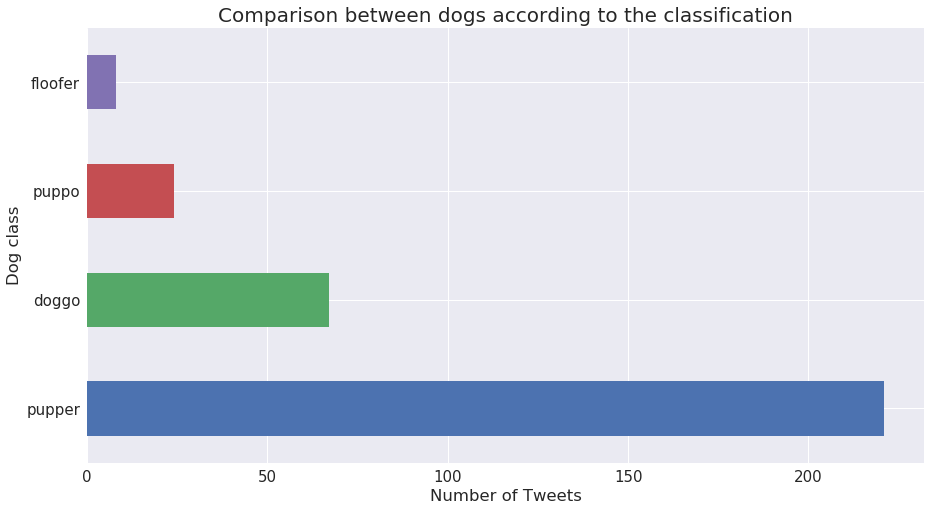

In [207]:
fig = plt.figure(figsize=(15,8))
twitter_archive_master.dog_type.value_counts().plot(kind='barh')
plt.title("Comparison between dogs according to the classification",fontsize=20)
plt.ylabel("Dog class")
plt.xlabel("Number of Tweets"); 

Conclusion:
    The popper dogs are the most liked dogs

### Dog types vs Rating:

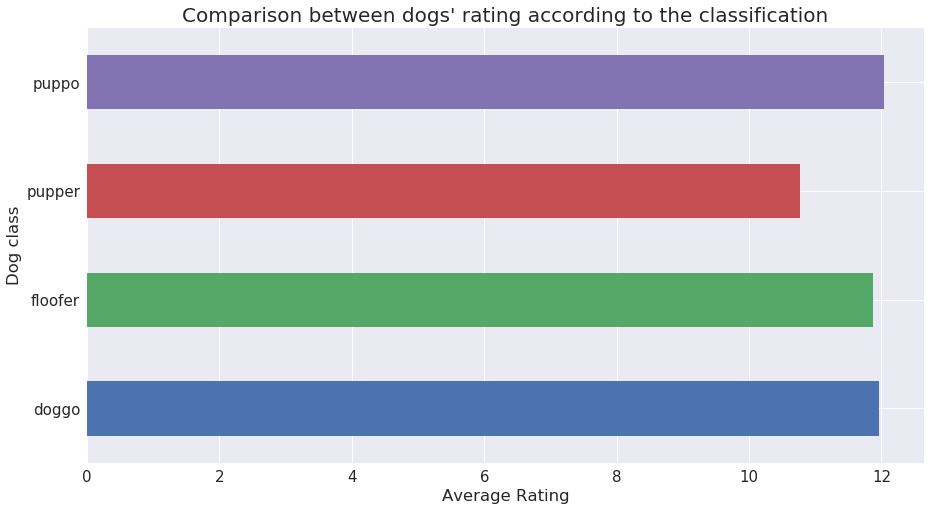

In [224]:
fig = plt.figure(figsize=(15,8))
twitter_archive_master.groupby('dog_type')['rating_numerator'].mean().plot(kind='barh')
plt.title("Comparison between dogs' rating according to the classification",fontsize=20)
plt.ylabel("Dog class")
plt.xlabel("Average Rating"); 

Conclosion:
    Dogs classifications puppo, floofer and doggo are the highest average rated dogs, then comes the pupper.

## favorite_count vs retweet_count:

In [234]:
twitter_archive_master.groupby('rating_numerator')[['favorite_count','retweet_count']].corr().describe()

favorite_count  retweet_count
count       30.000000      30.000000
mean         0.928963       0.928963
std          0.122201       0.122201
min          0.517910       0.517910
25%          0.906694       0.906694
50%          1.000000       1.000000
75%          1.000000       1.000000
max          1.000000       1.000000

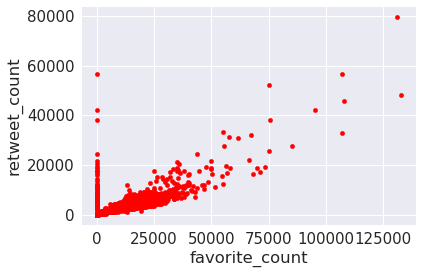

In [229]:
twitter_archive_master.plot(kind='scatter',x='favorite_count',y='retweet_count',color='red')
plt.show()

Conclusion:
    There are a strong relationship between the retweet_count and favorite_count.

## Dog types vs favorite_count and retweet_count:

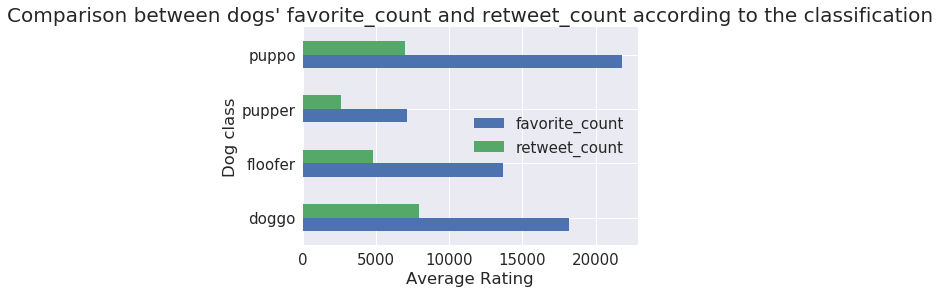

In [237]:
fig = plt.figure(figsize=(15,8))
twitter_archive_master.groupby('dog_type')['favorite_count', 'retweet_count'].mean().plot(kind='barh')
plt.title("Comparison between dogs' favorite_count and retweet_count according to the classification",fontsize=20)
plt.ylabel("Dog class")
plt.xlabel("Average Rating"); 

Conclusion:
    1- The retweet count for the doggo and puppo are the highest, but the lowest for pupper.
    2- the use of favorit count is more senstive than the retweet count.